In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import warnings
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')

In [61]:
# Variablar för att hålla dataframes
aws_flow_Big_df = pd.read_csv("aws_flow_log_ex_large.csv", sep=";")
countryCodes_df = pd.read_csv("country_codes.csv", sep=";")

In [62]:
# column categorier
aws_flow_Big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1700 non-null   int64  
 1   version       1700 non-null   int64  
 2   account-id    1700 non-null   int64  
 3   interface-id  1700 non-null   object 
 4   srcaddr       1700 non-null   object 
 5   dstaddr       1700 non-null   object 
 6   srcport       1700 non-null   int64  
 7   dstport       1700 non-null   int64  
 8   protocol      1700 non-null   int64  
 9   packets       1700 non-null   int64  
 10  bytes         1700 non-null   int64  
 11  start         1700 non-null   int64  
 12  end           1700 non-null   int64  
 13  action        1700 non-null   object 
 14  log-status    1700 non-null   object 
 15  src_city      1700 non-null   object 
 16  src_country   1700 non-null   object 
 17  src_alpha2    1700 non-null   object 
 18  src_lat       1700 non-null 

In [63]:
print(aws_flow_Big_df.head(1))

       timestamp  version    account-id           interface-id  \
0  1651356015000        2  738316572035  eni-0b94f7d040a6a5f37   

           srcaddr       dstaddr  srcport  dstport  protocol  packets  ...  \
0  162.142.125.181  172.30.0.129    43462     6605         6        1  ...   

   src_city    src_country  src_alpha2 src_lat src_lng dst_city dst_country  \
0   Chicago  United States          US   41.85  -87.65   Dublin     Ireland   

  dst_alpha2  dst_lat  dst_lng  
0         IE  53.3331  -6.2489  

[1 rows x 25 columns]


In [64]:
# Unix datetime
dates = pd.to_datetime(aws_flow_Big_df["timestamp"])
dates 

0      1970-01-01 00:27:31.356015
1      1970-01-01 00:27:31.356015
2      1970-01-01 00:27:31.356015
3      1970-01-01 00:27:31.356015
4      1970-01-01 00:27:31.356015
                  ...            
1695   1970-01-01 00:27:31.365555
1696   1970-01-01 00:27:31.365555
1697   1970-01-01 00:27:31.365555
1698   1970-01-01 00:27:31.365555
1699   1970-01-01 00:27:31.365555
Name: timestamp, Length: 1700, dtype: datetime64[ns]

In [65]:
# totala summan av bytes
Total = aws_flow_Big_df['bytes'].sum()
print(Total)

5544072


<AxesSubplot:title={'center':'Action'}, xlabel='action', ylabel='count'>

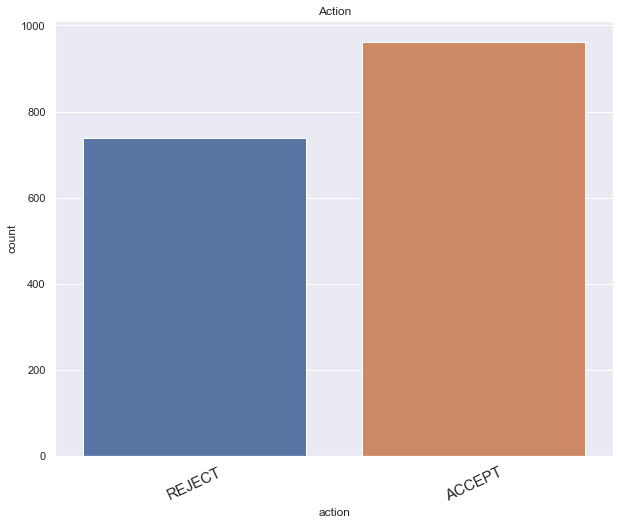

In [66]:
# action mest accept
sns.set()
plt.figure(figsize=(10,8))
plt.title("Action")
plt.xticks(fontsize = 15, rotation = 25)
sns.countplot(aws_flow_Big_df['action'])

<AxesSubplot:title={'center':'protocol'}, xlabel='protocol', ylabel='count'>

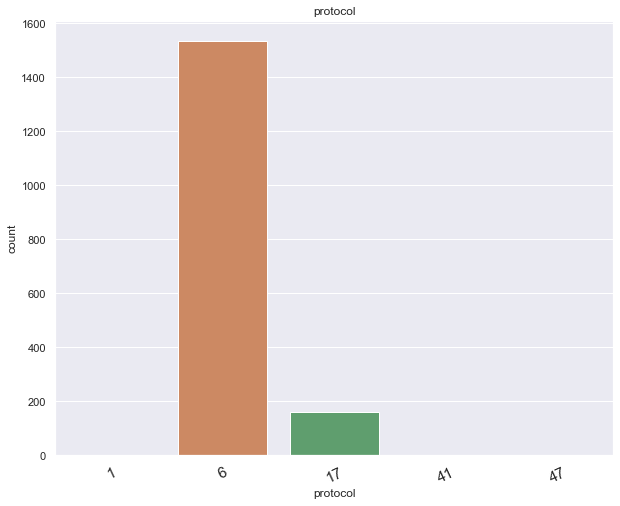

In [67]:
# 6 protocols 
sns.set()
plt.figure(figsize=(10,8))
plt.title("protocol")
plt.xticks(fontsize = 15, rotation = 25)
sns.countplot(aws_flow_Big_df['protocol'])

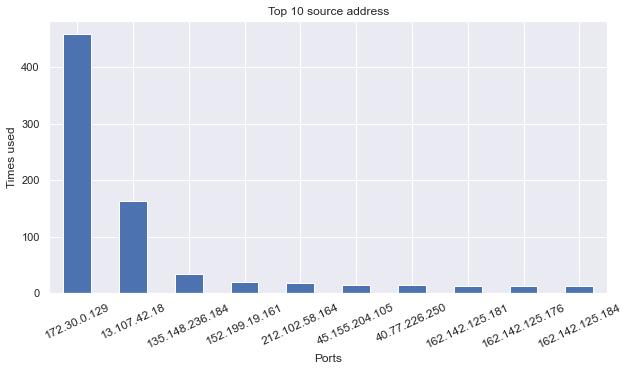

In [68]:
# 10 top source ports
plt.figure(figsize=(10,5))
dst_port = aws_flow_Big_df['srcaddr'].value_counts()
ax1 = dst_port[0:10].plot(kind = 'bar')
ax1.set_xlabel('Ports')
ax1.set_ylabel('Times used')
plt.tight_layout
plt.title('Top 10 source address')
plt.xticks(fontsize = 12, rotation = 25)
plt.show()


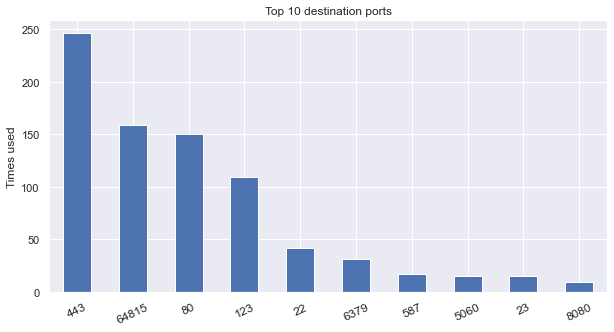

In [69]:
# Top 10 destination ports
plt.figure(figsize=(10,5))
dst_port = aws_flow_Big_df['dstport'].value_counts()
ax1 = dst_port[0:10].plot(kind = 'bar')
ax1.set_xlabel('')
ax1.set_ylabel('Times used')
plt.tight_layout
plt.title('Top 10 destination ports')
plt.xticks(fontsize = 12, rotation = 25)
plt.show()

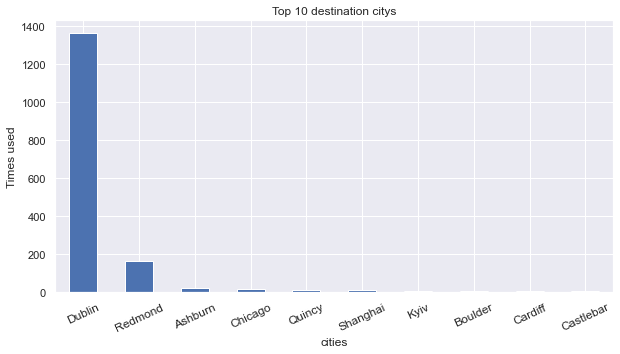

In [70]:
# Top 10 destination citys
plt.figure(figsize=(10,5))
dst_port = aws_flow_Big_df['dst_city'].value_counts()
ax1 = dst_port[0:10].plot(kind = 'bar')
ax1.set_xlabel('cities')
ax1.set_ylabel('Times used')
plt.tight_layout
plt.title('Top 10 destination citys')
plt.xticks(fontsize = 12, rotation = 25)
plt.show()

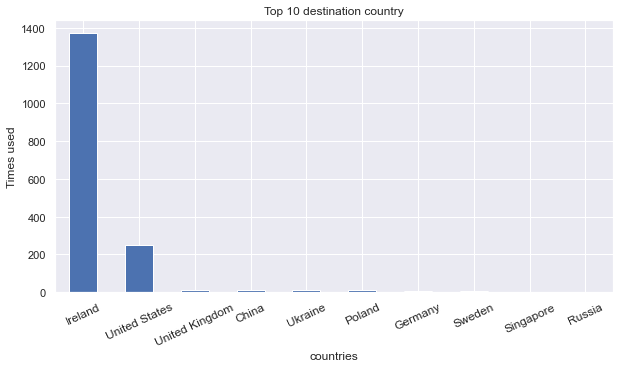

In [71]:
# Top 10 destination country
plt.figure(figsize=(10,5))
dst_port = aws_flow_Big_df['dst_country'].value_counts()
ax1 = dst_port[0:10].plot(kind = 'bar')
ax1.set_xlabel('countries')
ax1.set_ylabel('Times used')
plt.tight_layout
plt.title('Top 10 destination country')
plt.xticks(fontsize = 12, rotation = 25)
plt.show()

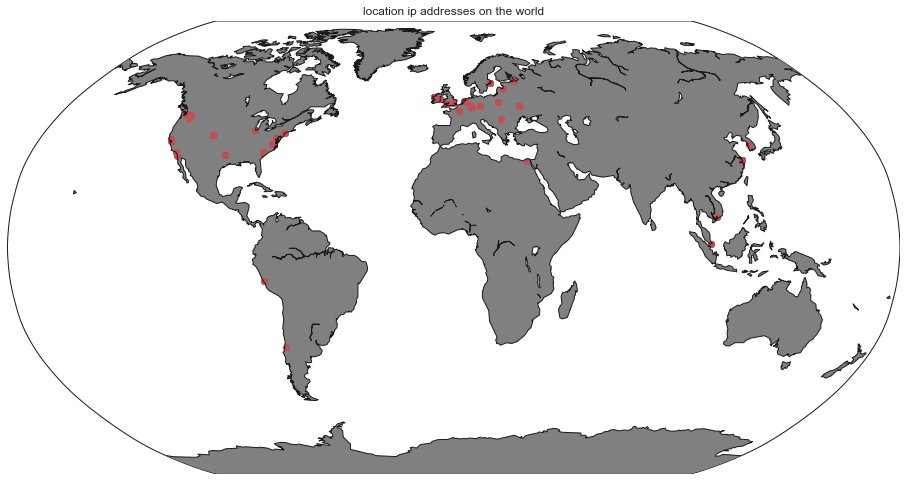

In [72]:
# world map
plt.figure(figsize=(16,10))
map = Basemap(projection='robin', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='white')
map.fillcontinents(color='gray',lake_color='white')
map.drawcoastlines()

lons = aws_flow_Big_df['dst_lng']
lats = aws_flow_Big_df['dst_lat']

x, y = map(lons, lats)

map.scatter(x, y, color='r')
plt.title("location ip addresses on the world")
plt.show()

Text(0.5, 1.0, 'Destination ip addresses')

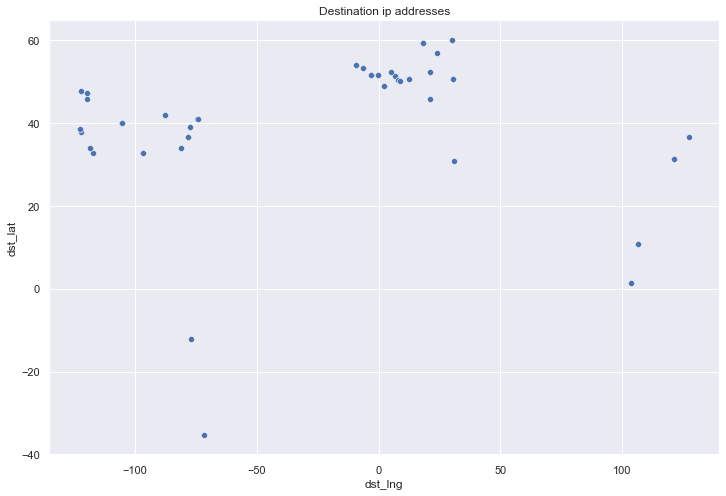

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=aws_flow_Big_df, x='dst_lng', y='dst_lat')
plt.title("Destination ip addresses")